<a href="https://colab.research.google.com/github/AamirKhaan/Student-Academic-Performance/blob/master/02_Categorical_Data_Visulaization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="background-color:Aqua; padding:20px; border-radius:10px">Categorical Data Visualization</h1>

## Overview

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-weight: bold">
    <p>Data visualization helps in anlysing the features of the data and helps in feature selction. In this section we will </p>
    <ol>
        <li>Import Cleaned Data.</li>
        <li>Split in Categorical and Numerical Features.</li>
        <li>Visualize Categorical Data.</li>
        <li>Visualize Target Data.</li>
    </ol>
</div>

### Standard Imports

In [1]:
#!pip install klib

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import klib as kl
import matplotlib.pyplot as plt

In [3]:
# Jupyter Noteboook Configurations (personal prefrences)
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Disable pretty
%pprint

%matplotlib inline

pd.set_option('display.max_columns', None)
sns.set() 

Pretty printing has been turned OFF


In [4]:
# Global parameters for figure
plt.rcParams["figure.figsize"] = [10.00, 8.00]
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.autolayout"] = True

### 1. Import Data

In [5]:
# Import the Student's data from local storage
# ! Dont' run the cell in colab
data = pd.read_csv('./data/xAPI-Edu-Data_cleaned.csv')
data = kl.data_cleaning(data)

Long column names detected (>25 characters). Consider renaming the following columns ['parent_school_satisfaction'].
Shape of cleaned data: (478, 17)Remaining NAs: 0

Changes:
Dropped rows: 0
     of which 0 duplicates. (Rows: [])
Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.05 MB (-83.33%)



In [ ]:
# Import the Student's data from github storage
# Run only in colab
url = 'https://raw.githubusercontent.com/AamirKhaan/Student-Academic-Performance/main/data/xAPI-Edu-Data_cleaned.csv'
data = pd.read_csv(url)
data = kl.data_cleaning(data)

In [6]:
# Cheack the data is properly loaded
data.head()

,gender,nationality,place_of_birth,stage_id,grade_id,section_id,topic,semester,relation,raised_hands,visited_resources,announcements_view,discussion,parent_answering_survey,parent_school_satisfaction,student_absence_days,class
0,M,Kuwait,Kuwait,LowerLevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,Kuwait,Kuwait,LowerLevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,Kuwait,Kuwait,LowerLevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,Kuwait,Kuwait,LowerLevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,Kuwait,Kuwait,LowerLevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [7]:
# Data Characteristics
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   gender                      478 non-null    category
 1   nationality                 478 non-null    category
 2   place_of_birth              478 non-null    category
 3   stage_id                    478 non-null    category
 4   grade_id                    478 non-null    category
 5   section_id                  478 non-null    category
 6   topic                       478 non-null    category
 7   semester                    478 non-null    category
 8   relation                    478 non-null    category
 9   raised_hands                478 non-null    int8    
 10  visited_resources           478 non-null    int8    
 11  announcements_view          478 non-null    int8    
 12  discussion                  478 non-null    int8    
 13  parent_answering_sur

### 2. Split in Categorical and Numerical Features

In [8]:
CATEGORICAL_FEATURES = list([column for column in data.columns if data.dtypes[column] == 'category'])[:-1]
CATEGORICAL_FEATURES

['gender', 'nationality', 'place_of_birth', 'stage_id', 'grade_id', 'section_id', 'topic', 'semester', 'relation', 'parent_answering_survey', 'parent_school_satisfaction', 'student_absence_days']

In [9]:
NUMERICAL_FEATURES = list([column for column in data.columns if data.dtypes[column] != 'category'])
NUMERICAL_FEATURES

['raised_hands', 'visited_resources', 'announcements_view', 'discussion']

In [10]:
TARGET = 'class'

### 3. Visualize Categorical Data

Categorical data can have following issues when considered for training ML models:

**Cardinalty:** Variables with too many labels tend to dominate over those with only few labels, particularly in Tree based Algorithms.

**Rare Labels:** Rare labels may be present in trianig set, but not in test set, causing over-fitting to the train set.

**Rare Labels:** Rare labels may appear in the test set, and not in the train set. Thus, the machine learning model will not know how to evaluate it for scoring.

In [11]:
for i,feature in enumerate(CATEGORICAL_FEATURES):
    print(f'{i+1}. {feature}: {len(data[feature].unique())} unique labels. \n {data[feature].unique().to_numpy()} \n')

1. gender: 2 unique labels. 
 ['M' 'F'] 

2. nationality: 14 unique labels. 
 ['Kuwait' 'Lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'Venezuela'
 'Iran' 'Tunis' 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Libya'] 

3. place_of_birth: 14 unique labels. 
 ['Kuwait' 'Lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'Venezuela'
 'Iran' 'Tunis' 'Morocco' 'Syria' 'Iraq' 'Palestine' 'Lybia'] 

4. stage_id: 3 unique labels. 
 ['LowerLevel' 'MiddleSchool' 'HighSchool'] 

5. grade_id: 10 unique labels. 
 ['G-04' 'G-07' 'G-08' 'G-06' 'G-05' 'G-09' 'G-12' 'G-11' 'G-10' 'G-02'] 

6. section_id: 3 unique labels. 
 ['A' 'B' 'C'] 

7. topic: 12 unique labels. 
 ['IT' 'Math' 'Arabic' 'Science' 'English' 'Quran' 'Spanish' 'French'
 'History' 'Biology' 'Chemistry' 'Geology'] 

8. semester: 2 unique labels. 
 ['F' 'S'] 

9. relation: 2 unique labels. 
 ['Father' 'Mum'] 

10. parent_answering_survey: 2 unique labels. 
 ['Yes' 'No'] 

11. parent_school_satisfaction: 2 unique labels. 
 ['Good' 'Bad'] 

12. student_

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-weight: bold">
<p>1. Features with 2 unique lables can be encoded as binary features.</p> 
<p>2. Feature with more than 2 independent lables can be coded as nominal features.
   (No relation exist between lables.)</p>
<p>3. Feature with more than 2 related lables can be coded as ordinal features.
   (There is ordinal relation between lables.)</p> 
</div>

#### 3.1 Binary Categorical Features

In [12]:
# Binary Features
BINARY_FEATURES = list([category for category in CATEGORICAL_FEATURES if (len(data[category].unique())) == 2])
print(BINARY_FEATURES )
print(f'Total number of Binary Categories: {len(BINARY_FEATURES)}')

['gender', 'semester', 'relation', 'parent_answering_survey', 'parent_school_satisfaction', 'student_absence_days']
Total number of Binary Categories: 6


In [13]:
binary_df = data[BINARY_FEATURES]
binary_df.head()

,gender,semester,relation,parent_answering_survey,parent_school_satisfaction,student_absence_days
0,M,F,Father,Yes,Good,Under-7
1,M,F,Father,Yes,Good,Under-7
2,M,F,Father,No,Bad,Above-7
3,M,F,Father,No,Bad,Above-7
4,M,F,Father,No,Bad,Above-7


<p style="color:red">The probabity represented here is probability of selection in single experiment.</br> It's  simple ratio of categories in the data sample.</p>

In [14]:
# helper function
# Converts a categorical fearture to a dataframe with category_labels, counts, and probability
def convert_to_df(feature,df):
    cols = len(df[feature].unique())

    data_gender = np.concatenate((
        np.array(df[feature].unique()),
        np.array(df[feature].value_counts()),
        df[feature].value_counts() / len(df[feature])), axis=0).reshape(3,cols).T

    df = pd.DataFrame(data_gender,
                       columns=['labels', 'counts','probability'])
    return df

In [15]:
gender_df = convert_to_df('gender', binary_df)
print('gender\n',gender_df)

gender
   labels counts probability
0      M    303    0.633891
1      F    175    0.366109


In [16]:
semester_df = convert_to_df('semester', binary_df)
print('semester\n',semester_df)

semester
   labels counts probability
0      F    244     0.51046
1      S    234     0.48954


In [17]:
relation_df = convert_to_df('relation', binary_df)
print('relation\n',relation_df)

relation
    labels counts probability
0  Father    281    0.587866
1     Mum    197    0.412134


In [18]:
parent_answering_survey_df = convert_to_df('parent_answering_survey', binary_df)
print('parent_answering_survey\n',parent_answering_survey_df)

parent_answering_survey
   labels counts probability
0    Yes    270    0.564854
1     No    208    0.435146


In [19]:
parent_school_satisfaction_df = convert_to_df('parent_school_satisfaction', binary_df)
print('parent_school_satisfaction\n',parent_school_satisfaction_df)

parent_school_satisfaction
   labels counts probability
0   Good    292    0.610879
1    Bad    186    0.389121


In [20]:
student_absence_days_df = convert_to_df('student_absence_days', binary_df)
print('student_absence_days\n',student_absence_days_df)

student_absence_days
     labels counts probability
0  Under-7    289    0.604603
1  Above-7    189    0.395397


#### 3.2 Binary Categorical Feature plots

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-weight: bold">
<p> Ploting binary feature counts gives us feature's balance visually.
<p> General rule of thumb upto 60:40 is considered a balnced data for ML model training. 


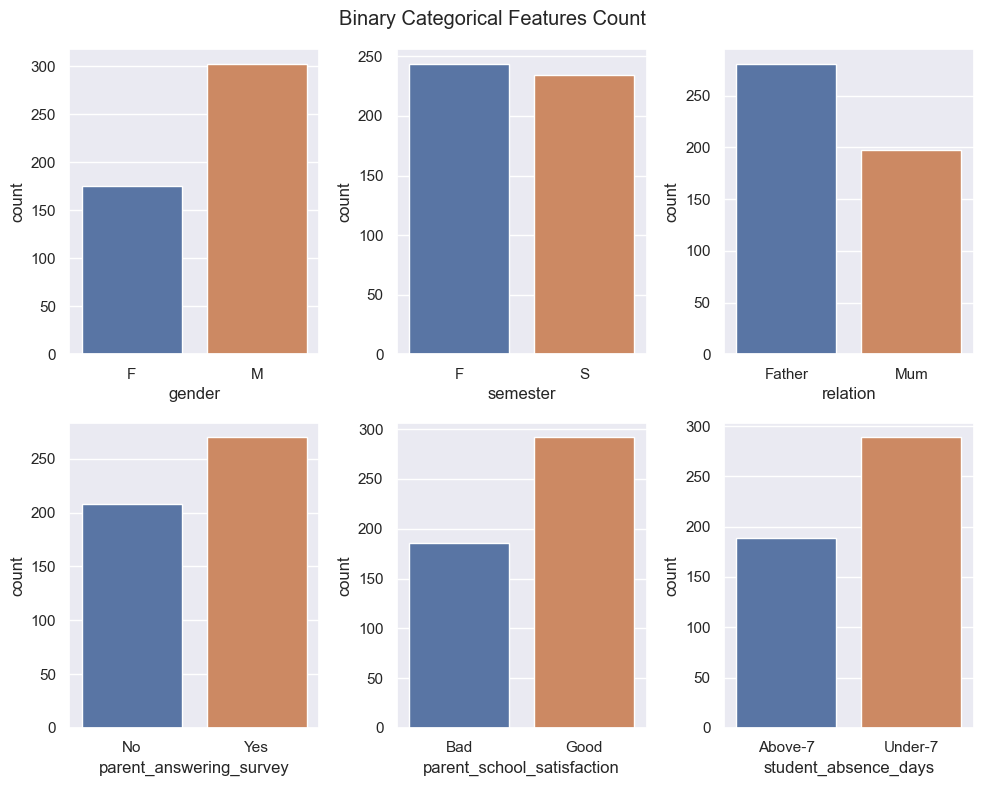

In [21]:
# Visualizing Binary Features Counts
fig, axs = plt.subplots(2,3)
fig.suptitle('Binary Categorical Features Count')

for i,feature in enumerate(BINARY_FEATURES):
    x = 0 if i <= 2 else 1
    y = i if i <= 2 else i-3
    sns.countplot(ax=axs[x,y], x=feature, data=binary_df)   

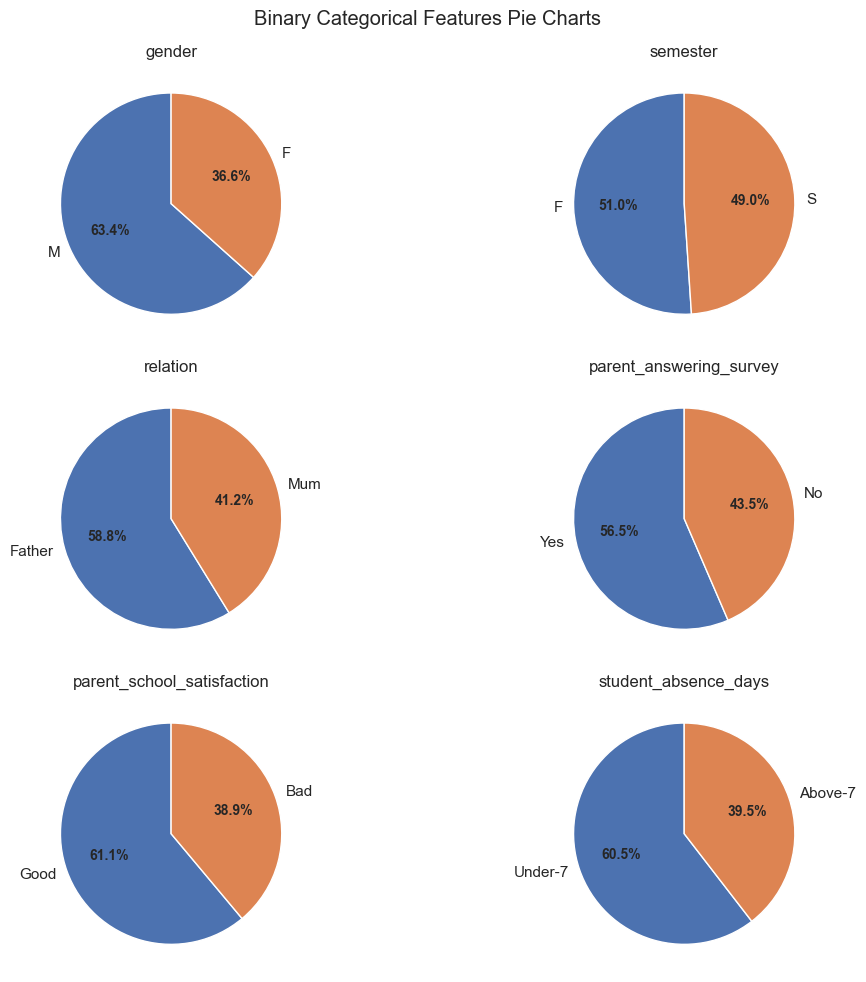

In [22]:
def pie_plot(r,c,name,data_frame):  
    txtLabels = tuple(data_frame['labels'].unique())
    fractions = data_frame['counts']
    _, _, autotexts = ax[r,c].pie(fractions, labels=txtLabels,autopct='%1.1f%%',startangle=90);
    ax[r,c].set_title(name)
    plt.setp(autotexts, size=10, weight="bold")
    
fig, ax = plt.subplots(3,2,figsize=(12, 10), subplot_kw=dict(aspect="equal"))
fig.suptitle('Binary Categorical Features Pie Charts')

pie_plot(0,0,'gender',gender_df)
pie_plot(0,1,'semester',semester_df)
pie_plot(1,0,'relation',relation_df)
pie_plot(1,1,'parent_answering_survey',parent_answering_survey_df)
pie_plot(2,0,'parent_school_satisfaction',parent_school_satisfaction_df)
pie_plot(2,1,'student_absence_days',student_absence_days_df)


<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-weight: bold">
The distribution in all the binary categorical features is very close to the 60:40 rule.

#### 3.3 Nominal and Ordinal Categorical Features

In [23]:
# Nominal Features
NOMINAL_FEATURES = list([category for category in CATEGORICAL_FEATURES if (len(data[category].unique())) != 2])
print(NOMINAL_FEATURES)
print(f'Total number of Nominal Categories: {len(NOMINAL_FEATURES)}')

['nationality', 'place_of_birth', 'stage_id', 'grade_id', 'section_id', 'topic']
Total number of Nominal Categories: 6


In [24]:
nominal_df = data[NOMINAL_FEATURES]
nominal_df

,nationality,place_of_birth,stage_id,grade_id,section_id,topic
0,Kuwait,Kuwait,LowerLevel,G-04,A,IT
1,Kuwait,Kuwait,LowerLevel,G-04,A,IT
2,Kuwait,Kuwait,LowerLevel,G-04,A,IT
3,Kuwait,Kuwait,LowerLevel,G-04,A,IT
4,Kuwait,Kuwait,LowerLevel,G-04,A,IT
...,...,...,...,...,...,...
473,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry
474,Jordan,Jordan,MiddleSchool,G-08,A,Geology
475,Jordan,Jordan,MiddleSchool,G-08,A,Geology
476,Jordan,Jordan,MiddleSchool,G-08,A,History


In [25]:
nationality_df = convert_to_df('nationality', nominal_df)
print('nationality\n',nationality_df)

nationality
          labels counts probability
0        Kuwait    179    0.374477
1       Lebanon    170    0.355649
2         Egypt     28    0.058577
3   SaudiArabia     22    0.046025
4           USA     17    0.035565
5        Jordan     12    0.025105
6     Venezuela     11    0.023013
7          Iran      9    0.018828
8         Tunis      7    0.014644
9       Morocco      6    0.012552
10        Syria      6    0.012552
11    Palestine      6    0.012552
12         Iraq      4    0.008368
13        Libya      1    0.002092


In [26]:
place_of_birth_df = convert_to_df('place_of_birth', nominal_df)
print('place_of_birth\n',place_of_birth_df)

place_of_birth
          labels counts probability
0        Kuwait    180    0.376569
1       Lebanon    174    0.364017
2         Egypt     22    0.046025
3   SaudiArabia     19    0.039749
4           USA     16    0.033473
5        Jordan     16    0.033473
6     Venezuela     10    0.020921
7          Iran      9    0.018828
8         Tunis      9    0.018828
9       Morocco      6    0.012552
10        Syria      6    0.012552
11         Iraq      6    0.012552
12    Palestine      4    0.008368
13        Lybia      1    0.002092


In [27]:
stage_id_df = convert_to_df('stage_id', nominal_df)
print('stage_id\n',stage_id_df)

stage_id
          labels counts probability
0    LowerLevel    248    0.518828
1  MiddleSchool    197    0.412134
2    HighSchool     33    0.069038


In [28]:
grade_id_df = convert_to_df('grade_id', nominal_df)
print('grade_id\n',grade_id_df)

grade_id
   labels counts probability
0   G-04    145    0.303347
1   G-07    116    0.242678
2   G-08    101    0.211297
3   G-06     48    0.100418
4   G-05     32    0.066946
5   G-09     13    0.027197
6   G-12     11    0.023013
7   G-11      5     0.01046
8   G-10      4    0.008368
9   G-02      3    0.006276


In [29]:
section_id_df = convert_to_df('section_id', nominal_df)
print('section_id\n',section_id_df)

section_id
   labels counts probability
0      A    281    0.587866
1      B    167    0.349372
2      C     30    0.062762


In [30]:
topic_df = convert_to_df('topic', nominal_df)
print('topic\n',topic_df)

topic
        labels counts probability
0          IT     95    0.198745
1        Math     63    0.131799
2      Arabic     59    0.123431
3     Science     51    0.106695
4     English     45    0.094142
5       Quran     30    0.062762
6     Spanish     25    0.052301
7      French     24    0.050209
8     History     24    0.050209
9     Biology     22    0.046025
10  Chemistry     21    0.043933
11    Geology     19    0.039749


#### 3.4 Nominal and Ordinal Categorical Feature plots

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-weight: bold">
'stage_id' and 'section_id' have low nominal values but 'nationality', 'placeof_birth','grade_id' and 'topic' have high cardinality and rare lables.

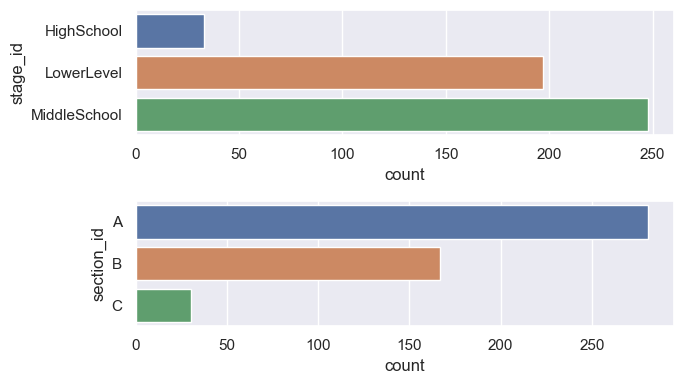

In [31]:
# Visualizing Binary Features Counts
plt.rcParams["figure.figsize"] = [7.00, 4.00]
fig, axs = plt.subplots(2)

sns.countplot(ax=axs[0], y='stage_id', data=nominal_df)
sns.countplot(ax=axs[1], y='section_id', data=nominal_df);

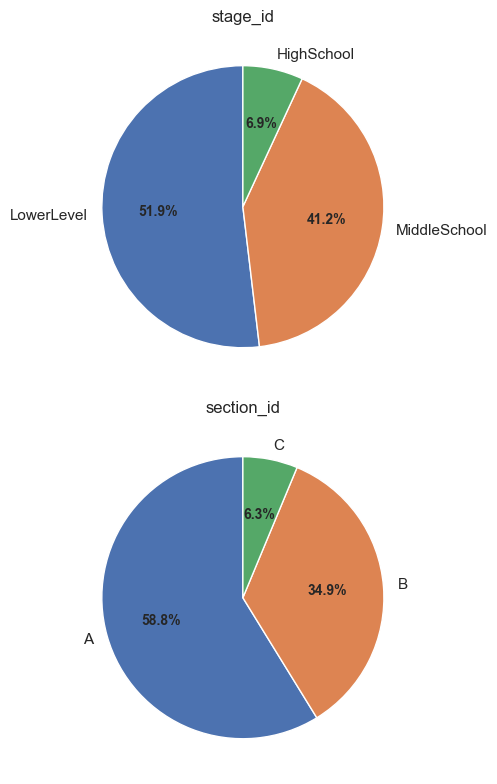

In [32]:
def pie_plot_col(r,c,name,data_frame):  
    txtLabels = tuple(data_frame['labels'].unique())
    fractions = data_frame['counts']
    _, _, autotexts = ax[c].pie(fractions, labels=txtLabels,autopct='%1.1f%%',startangle=90);
    ax[c].set_title(name)
    plt.setp(autotexts, size=10, weight="bold")
    
fig, ax = plt.subplots(2,figsize=(8, 8), subplot_kw=dict(aspect="equal"))

pie_plot_col(0,0,'stage_id',stage_id_df)
pie_plot_col(0,1,'section_id',section_id_df)

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-weight: bold">
 <p>'stage_id' and 'section_id'
 <p> Inspecting the histograms and pie charts revels that the labels in these two categories are not balance.

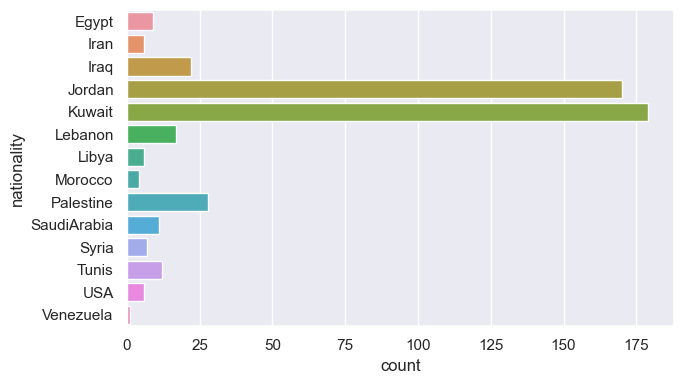

In [33]:
sns.countplot(y='nationality', data=nominal_df);

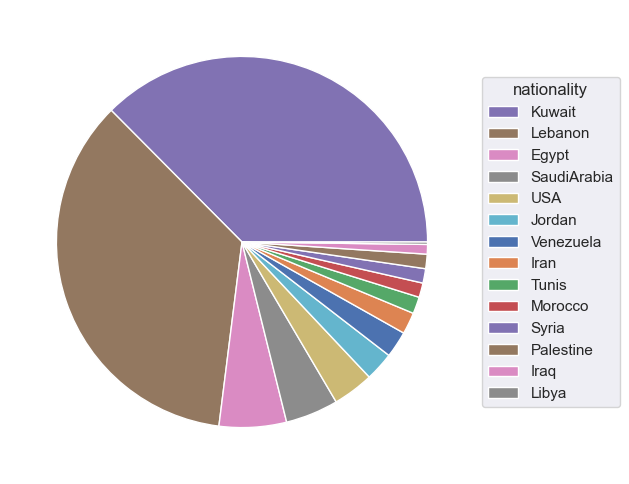

In [34]:
def pie_plot_single(data_df,title):
    data = data_df['counts']
    labels = list(data_df['labels'].unique())
    
    
    fig, ax = plt.subplots(figsize=(12, 5), subplot_kw=dict(aspect="equal"))
    wedges = ax.pie(nationality_df['counts'],startangle=90);
    wedges, texts = ax.pie(data)
    ax.legend(wedges, labels,
              title = title,
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1)); 

pie_plot_single(nationality_df,'nationality')

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-weight: bold">

<p> Inspecting the histogram and pie chart of 'nationality' revels the presence of rare labels.

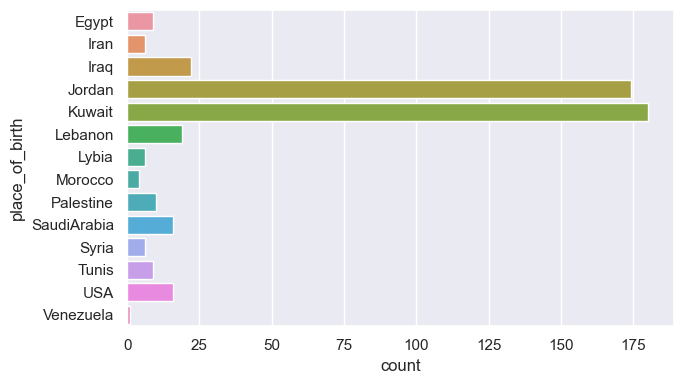

In [35]:
sns.countplot(y='place_of_birth', data=nominal_df);

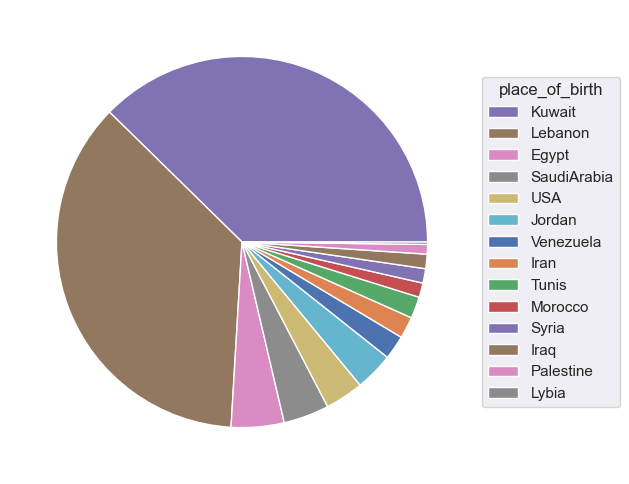

In [36]:
pie_plot_single(place_of_birth_df,'place_of_birth')

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-weight: bold">

<p> Inspecting the histogram and pie chart of 'place_of_birth' revels the presence of rare labels.
<p> Visually comparing the 'nationality' and 'place_of_birth' features also exibit close similarities. 

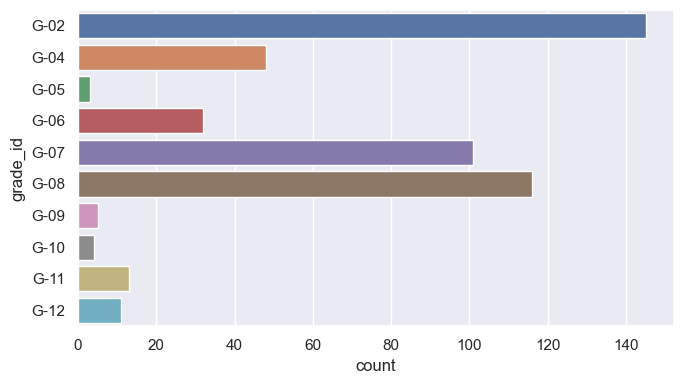

In [37]:
sns.countplot(y='grade_id', data=nominal_df);

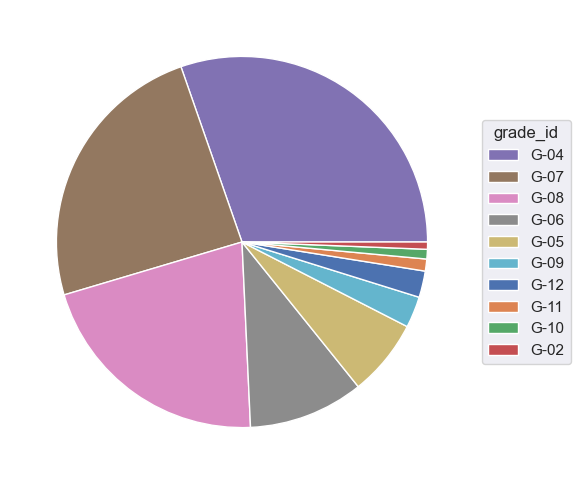

In [38]:
pie_plot_single(grade_id_df,'grade_id')

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-weight: bold">

<p> Inspecting the histogram and pie chart of 'grade_id' revels the presence of rare labels.

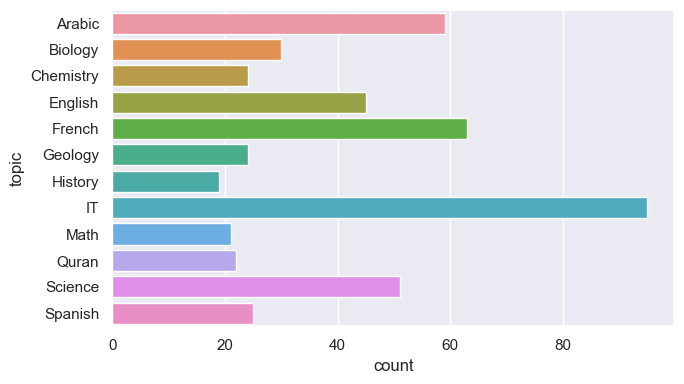

In [39]:
sns.countplot(y='topic', data=nominal_df);

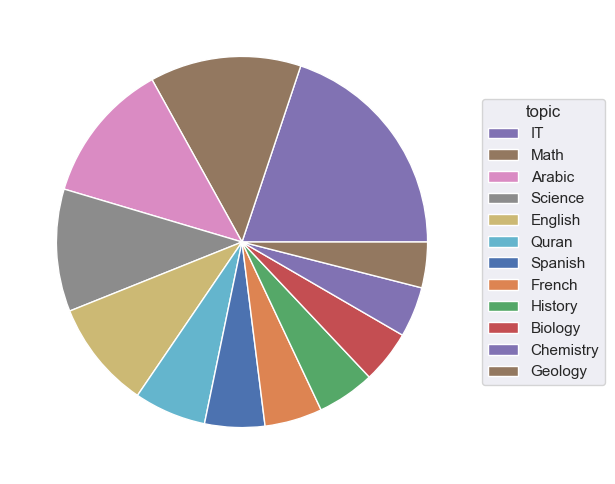

In [40]:
pie_plot_single(topic_df,'topic')

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-weight: bold">

<p> Inspecting the histogram and pie chart of 'topic' exibit variations in labels.

### 4. Visualize Target Data

In [41]:
target_df = convert_to_df(TARGET,data)
target_df

,labels,counts,probability
0,M,211,0.441423
1,L,142,0.297071
2,H,125,0.261506


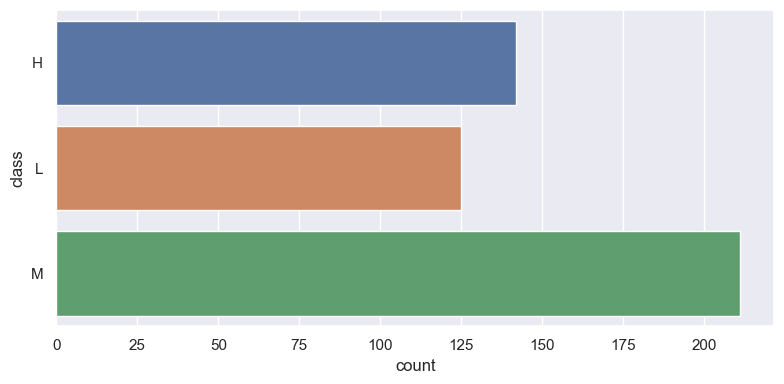

In [42]:
plt.figure(figsize=(8, 4))
sns.countplot(y=TARGET, data=data);

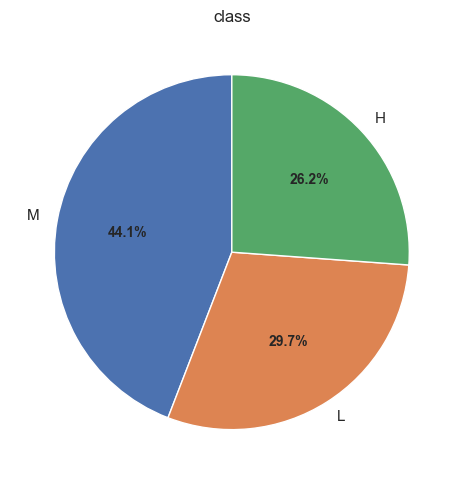

In [43]:
txtLabels = tuple(target_df['labels'].unique())
fractions = target_df['counts']

fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(aspect="equal"))

_, _, autotexts = ax.pie(fractions, labels=txtLabels, autopct='%1.1f%%',startangle=90);
ax.set_title('class')

plt.setp(autotexts, size=10, weight="bold");

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-weight: bold">

<p> Inspecting the histogram and pie chart of 'class' revels the presence of three nearly balnced classes.

## Observations

Graphically visualizing the categorical feature we observe:    

1. The presence of binary, nominal and cardinal categories.
2. Binary catregories are:   
    a. **'gender'**    
    b. **'semester'**   
    c. **'relation'**    
    d. **'parent_answering_survey'**   
    e. **'parent_school_satisfaction'**   
    f. **'student_absence_days'**   
3. Nomial categories are:    
    a. **'nationality'**    
    b. **'place_of_birth'**    
    c. **'section_id'**   
    d. **'topic'**
4. Ordinal categories are:   
    a. **'stage_id'**   
    b. **'grade_id'**    
5. The target feature is also Ordinal with three labels.
6. All binary categorical features and target are alsmot balaced.
7. Categories of **'nationality'** and **'place_of_birth'** features show the presence of rare labels and close similarity.  
8. Categories of **'satge_id'** and **'grade_id'** features are also intutively similar.
9. Categories of **'section_id'** and **'stage_id'** shows similar distributions but are independent.
10. Categories of **'topic'** have higher cardinality.

## Conclusion

Based on the obervations:

1. Due to the balnced nature all binary categorical featurea require no further processing.
2. The target calss is also balanced and nedd no processing.
3. Due to the presence of rare lables categories of **'nationality'** and **'place_of_birth'** require feature engineering.
4. Due to the close similarities of **'satge_id'** and **'grade_id'**, these features require close observation in feature selection stage.   
5. Higher cardinality of **'topic'** featre also require feature engineering possibly division in STEM and Humanities categories.